Najlepsza sekwencja: [96, 66, 21, 45, 98, 68, 37, 73, 17, 82, 85, 20, 46, 4, 83, 92, 53, 58, 60, 5, 89, 34, 56, 55, 18, 54, 70, 80, 47, 15, 94, 81, 30, 93, 59, 42, 35, 71, 86, 31, 33, 40, 78, 13, 29, 25, 6, 16, 10, 74, 22, 72, 57, 11, 69, 48, 77, 91, 23, 27, 9, 8, 87, 14, 51, 50, 49, 61, 39, 52, 88, 90, 12, 3, 65, 99, 19, 75, 64, 24, 0, 84, 43, 95, 97, 1, 7, 67, 41, 26, 36, 63, 79, 38, 32, 28, 76, 62, 44, 2]
Makespan: 3227


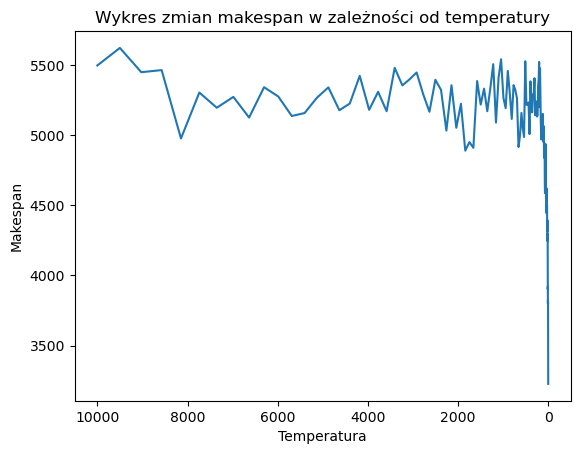

In [6]:
import random
import math
import matplotlib.pyplot as plt

def read_rpq_data(filepath):
    tasks = []
    with open(filepath, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) == 3:
                r, p, q = map(int, parts)
                tasks.append((r, p, q))
    return tasks

def calculate_makespan(sequence, tasks):
    time = 0
    end_time = 0
    for task in sequence:
        r, p, q = tasks[task]
        time = max(time + p, r + p)
        end_time = max(end_time, time + q)
    return end_time

def simulated_annealing(tasks, initial_temp, cooling_rate, iteration_per_temp):
    current_temp = initial_temp
    current_sequence = list(range(len(tasks)))
    random.shuffle(current_sequence)
    current_makespan = calculate_makespan(current_sequence, tasks)
    
    temperatures = []  # Lista do przechowywania temperatur
    makespans = []  # Lista do przechowywania wartości makespan

    while current_temp > 1:
        for _ in range(iteration_per_temp):
            new_sequence = current_sequence.copy()
            i, j = random.sample(range(len(tasks)), 2)
            new_sequence[i], new_sequence[j] = new_sequence[j], new_sequence[i]

            new_makespan = calculate_makespan(new_sequence, tasks)
            if new_makespan < current_makespan or random.random() < math.exp((current_makespan - new_makespan) / current_temp):
                current_sequence, current_makespan = new_sequence, new_makespan
        
        temperatures.append(current_temp)
        makespans.append(current_makespan)
        
        current_temp *= cooling_rate

    return current_sequence, current_makespan, temperatures, makespans

# Parametry algorytmu
initial_temp = 10000
cooling_rate = 0.95
iteration_per_temp = 50

# Uruchomienie algorytmu
filepath = 'rpq_100.txt'  # Zmień na aktualną ścieżkę do pliku
tasks = read_rpq_data(filepath)
best_sequence, best_makespan, temperatures, makespans = simulated_annealing(tasks, initial_temp, cooling_rate, iteration_per_temp)

print("Najlepsza sekwencja:", best_sequence)
print("Makespan:", best_makespan)

# Rysowanie wykresu
plt.plot(temperatures, makespans)
plt.gca().invert_xaxis()  # Odwrócenie osi X, aby temperatura malejąca była przedstawiona od lewej do prawej
plt.xlabel('Temperatura')
plt.ylabel('Makespan')
plt.title('Wykres zmian makespan w zależności od temperatury')
plt.show()
